In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [118]:
df=pd.read_csv(r"C:\Users\shrouk\Desktop\movies_rating.csv")

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [120]:
print(df.head(10))

                                 Name    Year Duration  \
0                                         NaN      NaN   
1  #Gadhvi (He thought he was Gandhi) -2019.0  109 min   
2                         #Homecoming -2021.0   90 min   
3                             #Yaaram -2019.0  110 min   
4                   ...And Once Again -2010.0  105 min   
5                ...Aur Pyaar Ho Gaya -1997.0  147 min   
6                           ...Yahaan -2005.0  142 min   
7                      .in for Motion -2008.0   59 min   
8                  ?: A Question Mark -2012.0   82 min   
9                            @Andheri -2014.0  116 min   

                       Genre  Rating  Votes            Director  \
0                      Drama     NaN    NaN       J.S. Randhawa   
1                      Drama     7.0      8       Gaurav Bakshi   
2             Drama, Musical     NaN    NaN  Soumyajit Majumdar   
3            Comedy, Romance     4.4     35          Ovais Khan   
4                      Dra

In [121]:
#remove rows contains null in rating column
df['Rating']=df['Rating'].fillna(0)
df=df[df['Rating'] != 0.0]
df.isna().sum()

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7919 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7919 non-null   object 
 1   Year      7919 non-null   float64
 2   Duration  5851 non-null   object 
 3   Genre     7817 non-null   object 
 4   Rating    7919 non-null   float64
 5   Votes     7919 non-null   object 
 6   Director  7914 non-null   object 
 7   Actor 1   7794 non-null   object 
 8   Actor 2   7719 non-null   object 
 9   Actor 3   7627 non-null   object 
dtypes: float64(2), object(8)
memory usage: 680.5+ KB


In [123]:
#fill nulls in Duration by mean
df['Duration'] = df['Duration'].str.replace(' min', '')
#print(df['Duration'])

x=df['Duration'].fillna(0).astype(int).mean()
#print(x)
df['Duration'].fillna(x, inplace =True)
df.isnull().sum()

Name          0
Year          0
Duration      0
Genre       102
Rating        0
Votes         0
Director      5
Actor 1     125
Actor 2     200
Actor 3     292
dtype: int64

In [124]:
df=df.dropna()
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [125]:
#convert Duration type to int
print(type(df['Duration']))
df['Duration']=df['Duration'].astype(int)

<class 'pandas.core.series.Series'>


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   float64
 2   Duration  7558 non-null   int32  
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   object 
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(2), int32(1), object(7)
memory usage: 620.0+ KB


Q1 (25%) = 4.0     Q3 (75%) = 6.0     IQR = 2.0     lower = 1.0     upper = 9.0
Number Of Outlier Element :  1 elements
Number Of Non Outlier Element :  7557 elements
Outliers is : [10]


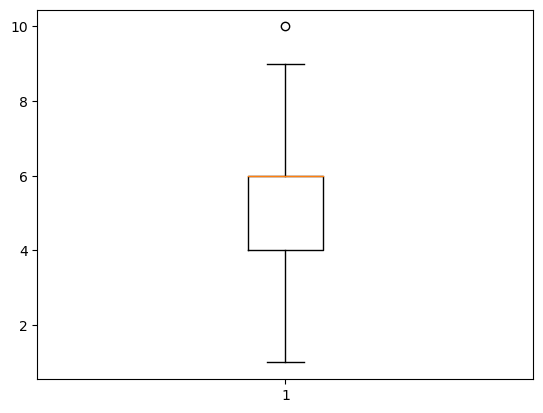

In [127]:
#check outlier at Rating
df['Rating'] = df['Rating'].astype(int)
q1 = df['Rating'].quantile(0.25)
q3 = df['Rating'].quantile(0.75)
iqr = q3 - q1
lower = (q1 - 1.5 * iqr)
upper = (q3 + 1.5 * iqr)
print("Q1 (25%) =" ,q1 ,"   ","Q3 (75%) =" ,q3,"   ","IQR =" , iqr,"   ","lower =" ,lower ,"   ","upper =" ,upper)
outlier_array = []
number_of_outlier_element = 0
for item in df['Rating']:
    if(item < lower):
        outlier_array.append(item)
        number_of_outlier_element = number_of_outlier_element + 1
    elif(item > upper):
        outlier_array.append(item)
        number_of_outlier_element = number_of_outlier_element + 1
outlier_array.sort()
print("Number Of Outlier Element : ",number_of_outlier_element,"elements")
print("Number Of Non Outlier Element : ",(df['Rating'].count()-number_of_outlier_element),"elements")
print(f"Outliers is : {outlier_array}")

plt.boxplot(df['Rating'])
# show plot
plt.show()


In [128]:
#convert categorical data to numeric
df['Actor 1']=pd.factorize(df['Actor 1'])[0]
df['Actor 2']=pd.factorize(df['Actor 2'])[0]
df['Actor 3']=pd.factorize(df['Actor 3'])[0]
df['Director']=pd.factorize(df['Director'])[0]
df['Genre']=pd.factorize(df['Genre'])[0]
print(df.head(10))


                                  Name    Year  Duration  Genre  Rating  \
1   #Gadhvi (He thought he was Gandhi) -2019.0       109      0       7   
3                              #Yaaram -2019.0       110      1       4   
5                 ...Aur Pyaar Ho Gaya -1997.0       147      2       4   
6                            ...Yahaan -2005.0       142      3       7   
8                   ?: A Question Mark -2012.0        82      4       5   
9                             @Andheri -2014.0       116      5       4   
10           1:1.6 An Ode to Lost Love -2004.0        96      0       6   
11                1:13:7 Ek Tera Saath -2016.0       120      6       5   
12                            100 Days -1991.0       161      7       6   
13                           100% Love -2012.0       166      8       5   

    Votes  Director  Actor 1  Actor 2  Actor 3  
1       8         0        0        0        0  
3      35         1        1        1        1  
5     827         2        

In [129]:
df['Year'] = df['Year'].abs()
df['Year']=df['Year'].astype(int)
#df['Year']

In [130]:
df.describe()

,Year,Duration,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
count,7558.000000,7558.000000,7558.000000,7558.000000,7558.000000,7558.000000,7558.000000,7558.000000
mean,1993.421011,124.283541,57.500000,5.363456,954.502779,609.487563,814.388198,940.844800
std,20.004711,27.015312,71.275505,1.404853,805.547319,641.638807,757.237235,831.358653
min,1917.000000,21.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1980.000000,97.000000,9.000000,4.000000,266.000000,130.000000,202.000000,238.000000
50%,1996.000000,125.000000,35.000000,6.000000,682.500000,324.000000,517.000000,658.000000
75%,2011.000000,144.000000,65.000000,6.000000,1493.750000,927.000000,1277.750000,1478.750000
max,2021.000000,321.000000,415.000000,10.000000,2955.000000,2414.000000,2782.000000,3030.000000


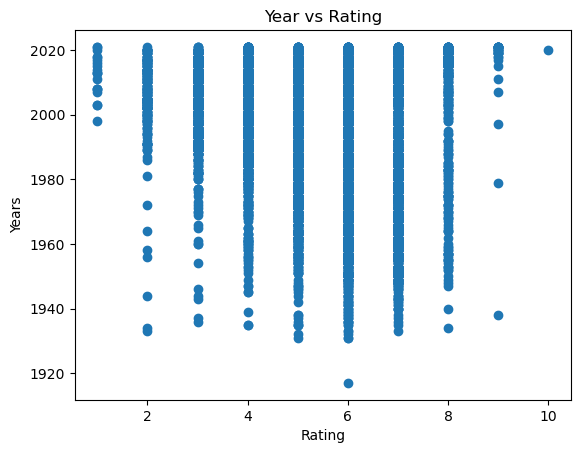

In [131]:
plt.scatter(x='Rating',y='Year' , data=df)
plt.title('Year vs Rating')
plt.ylabel('Years')
plt.xlabel('Rating')
plt.show()

In [132]:
high_rating =df[df['Rating'] > 6.0]
high_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1602 entries, 1 to 15476
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      1602 non-null   object
 1   Year      1602 non-null   int32 
 2   Duration  1602 non-null   int32 
 3   Genre     1602 non-null   int64 
 4   Rating    1602 non-null   int32 
 5   Votes     1602 non-null   object
 6   Director  1602 non-null   int64 
 7   Actor 1   1602 non-null   int64 
 8   Actor 2   1602 non-null   int64 
 9   Actor 3   1602 non-null   int64 
dtypes: int32(3), int64(5), object(2)
memory usage: 118.9+ KB


In [133]:
high_rating.describe()

,Year,Duration,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
count,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000
mean,1991.286517,127.449438,60.493758,7.207865,972.644195,665.760924,873.154182,1066.728464
std,23.533987,29.252529,81.458712,0.451094,815.510621,673.390365,778.517493,867.191260
min,1933.000000,21.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,1972.000000,99.250000,2.000000,7.000000,308.000000,137.000000,219.000000,318.250000
50%,1994.000000,127.500000,32.000000,7.000000,671.500000,360.000000,575.000000,808.000000
75%,2014.750000,148.000000,65.000000,7.000000,1482.500000,1037.000000,1407.250000,1663.250000
max,2021.000000,321.000000,415.000000,10.000000,2948.000000,2396.000000,2776.000000,3026.000000


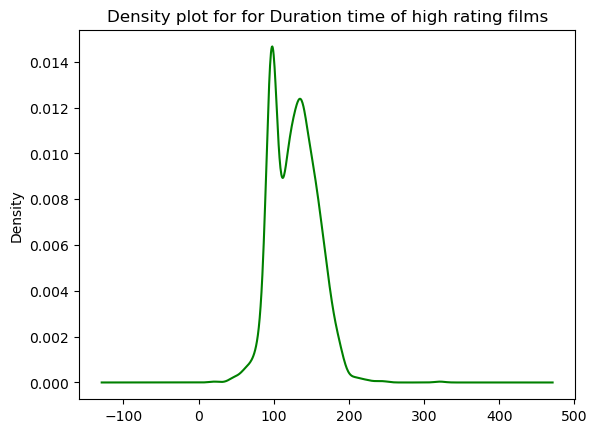

In [134]:
high_rating.Duration.plot.density(color='green' )
plt.title('Density plot for for Duration time of high rating films')
plt.show()

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      7558 non-null   object
 1   Year      7558 non-null   int32 
 2   Duration  7558 non-null   int32 
 3   Genre     7558 non-null   int64 
 4   Rating    7558 non-null   int32 
 5   Votes     7558 non-null   object
 6   Director  7558 non-null   int64 
 7   Actor 1   7558 non-null   int64 
 8   Actor 2   7558 non-null   int64 
 9   Actor 3   7558 non-null   int64 
dtypes: int32(3), int64(5), object(2)
memory usage: 560.9+ KB


In [136]:
from sklearn.model_selection import train_test_split
x= df[['Duration','Genre','Director','Actor 1','Actor 2','Actor 3']]
y=df.Rating 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [137]:
print(x.shape)
print(y.shape)

(7558, 6)
(7558,)


In [138]:
from sklearn.ensemble import RandomForestRegressor
rfmodel = RandomForestRegressor(n_estimators=100, random_state=42)
rfmodel.fit(x_train, y_train)
y_pred = rfmodel.predict(x_test)


In [139]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.8569896825396828


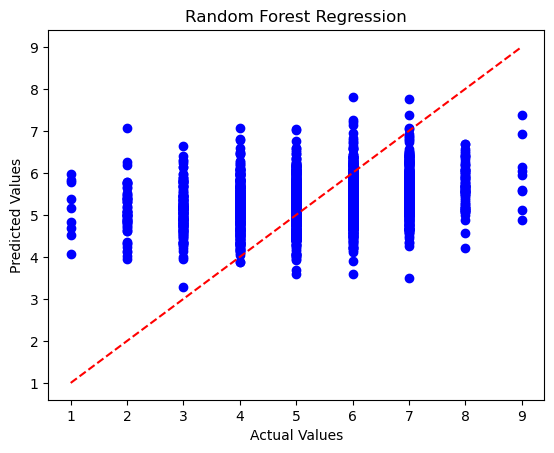

In [140]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression')
plt.show()

In [141]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)

y_pred = dt_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3.5383597883597884


In [142]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.9615246265486972


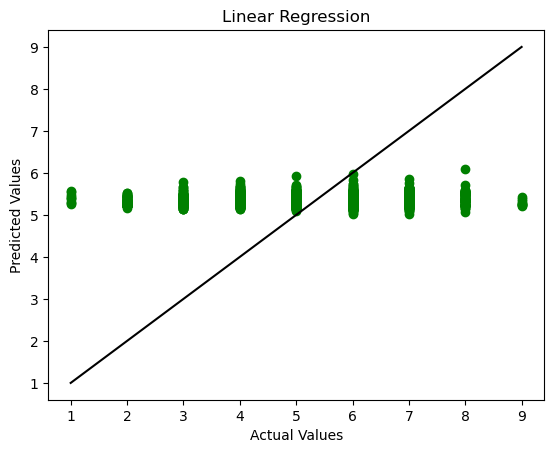

In [143]:
plt.scatter(y_test, y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression')
plt.show()